#### Import the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

#### Load the Data

In [7]:
df = pd.read_csv('banknotes.csv')

In [8]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


#### Separate the Class

In [10]:
# input the data 
x = df.drop('Class', axis = 1)

# output data
y = df['Class']

In [11]:
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [12]:
np.unique(y)

array([0, 1], dtype=int64)

In [13]:
y.value_counts()

0    762
1    610
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

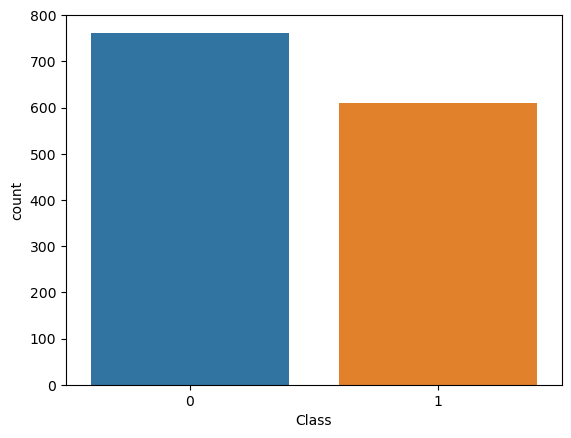

In [14]:
sns.countplot(x = y)

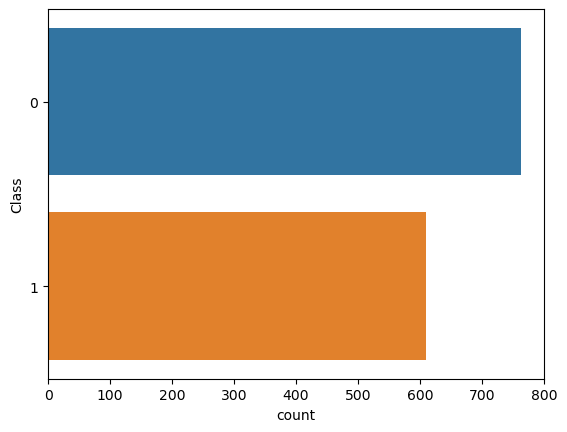

In [15]:
sns.countplot(y = y);

#### Explore the Data

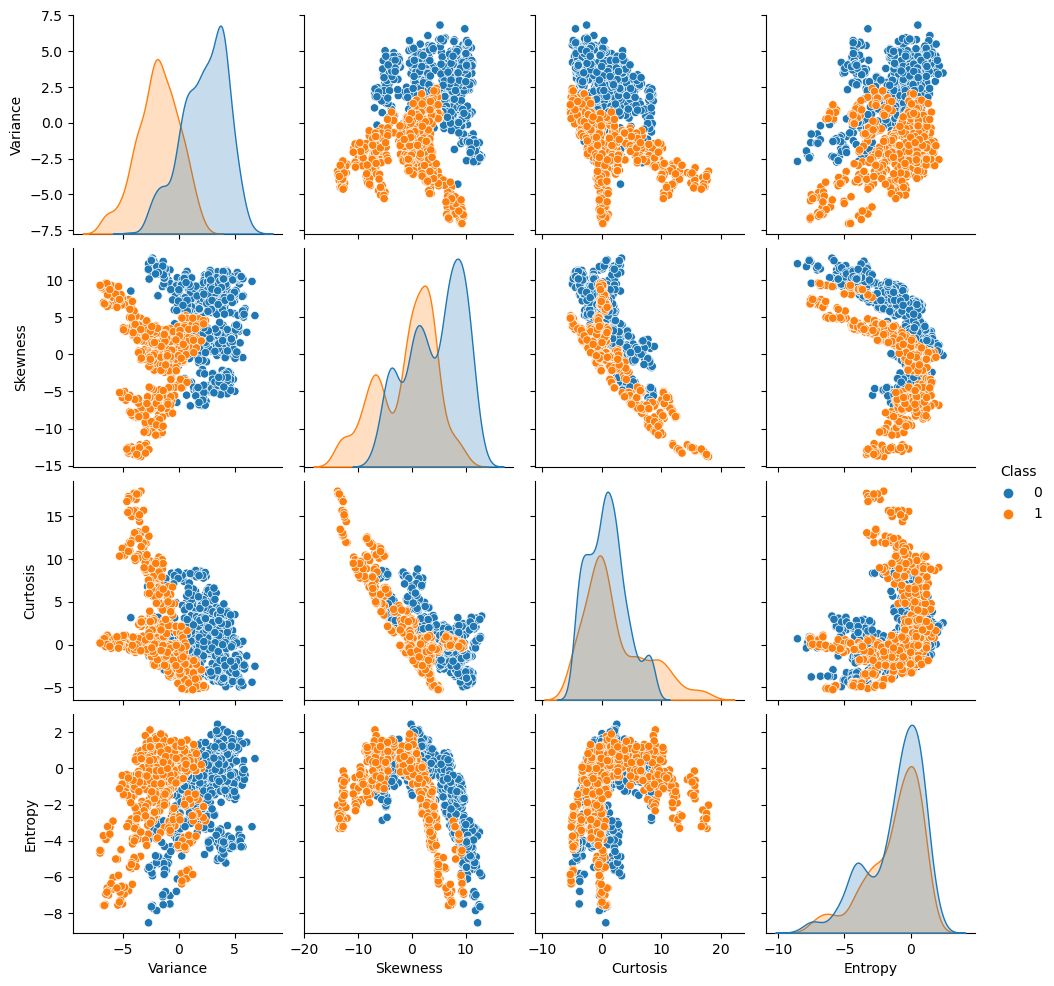

In [17]:
sns.pairplot(df, hue='Class')

In [18]:
x.shape

(1372, 4)

#### Cross Validation

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [21]:
x_train.shape

(1029, 4)

In [22]:
x_test.shape

(343, 4)

#### Build the Model

In [24]:
classifier = DecisionTreeClassifier(random_state=0)

In [25]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
from sklearn.tree import plot_tree

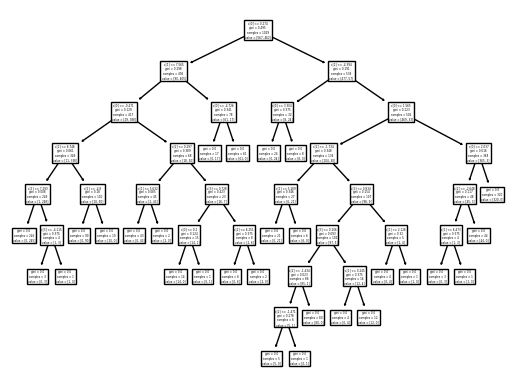

In [27]:
plot_tree(classifier);

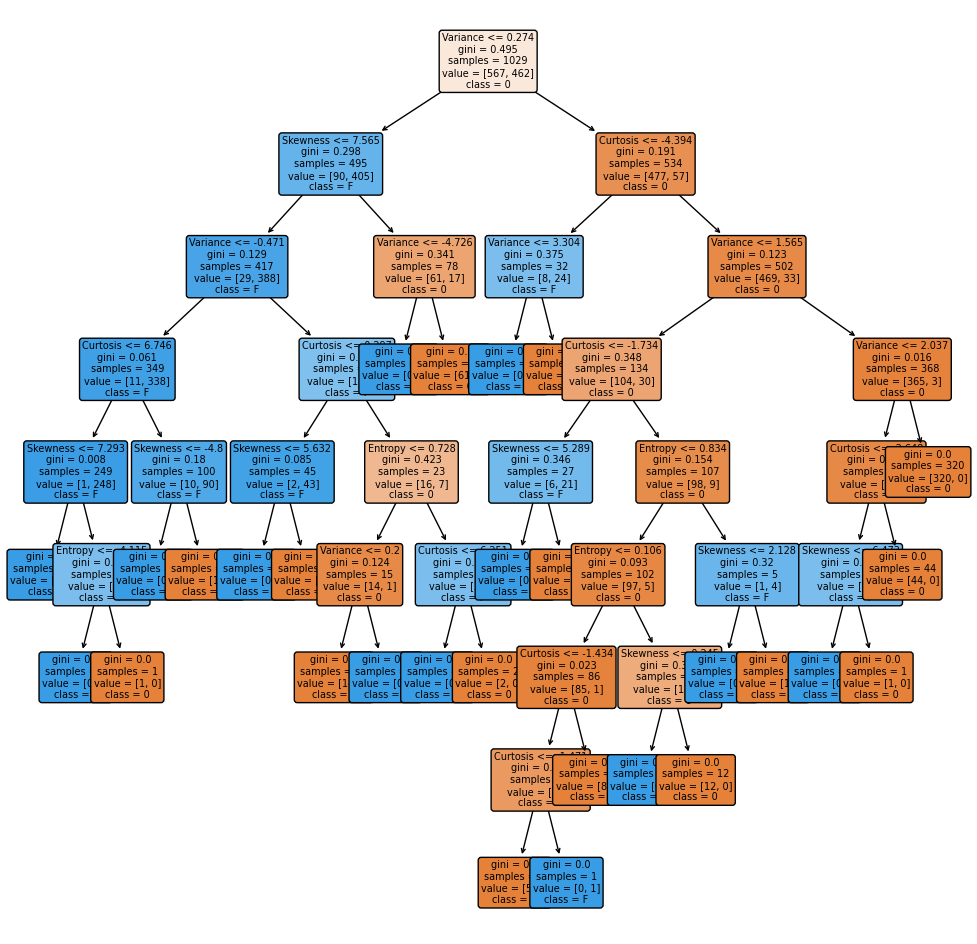

In [28]:
plt.figure(figsize=(12,12))
plot_tree(classifier, fontsize=7, filled=True, rounded=True,
         feature_names=list(x.columns), class_names=['0','F']);

In [29]:
x.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

#### Performance Evalution

In [31]:
y_pred = classifier.predict(x_test)

In [32]:
y_pred;

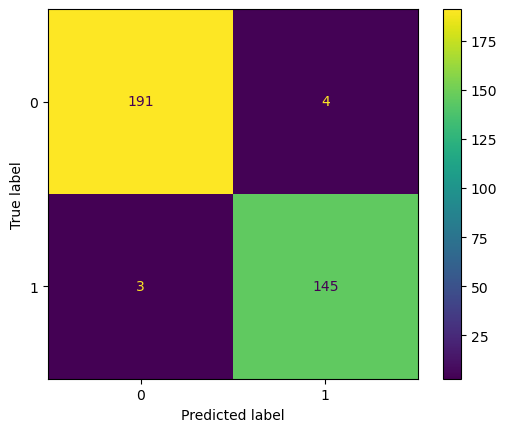

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [34]:
accuracy_score(y_test, y_pred)

0.9795918367346939

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [36]:
new1 = [[3.45660, 9.52280, -4.0112, -3.59440]]
new2 = [[-3.56370, -8.38270, 12.3930, -1.28230]]

In [37]:
classifier.predict(new1)[0]

F:\Program Data\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

In [38]:
classifier.predict(new2)[0]

F:\Program Data\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [ ]:
MITU 